<font color = 'green' size =6>7 Days Of Code Dia 1: Leitura dos Dados</font>

Neste dia vou ler os dados do spotify, corrigir inconsistências como valores faltantes e duplicados, e analisar os dados trazendo algum conhecimento sobre os dados e preparando algo para o modelo de machine learning. 

Tarefas Neste notebook:
1. Verificar Dados Faltantes e Duplicados
2. Analisar correlação
3. Analisar variáveis Discretas(agrupamento se possível)
4. TOPS 5 música, artista e gênero por popularidade
5. Normalizar os Dados

# Importar Bibliotecas e Ler os Dados


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KaueAbbe/7DaysofCode_ML/main/dataset.csv')

# Analise Dados Faltantes e Duplicados

In [3]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
df[df['artists'].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Vou usar a API do spotify para procurar o nome do artista, album e da track.

In [6]:
!pip install spotipy

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [8]:
scope = 'user-library-read playlist-modify-private'
OAuth = SpotifyOAuth(
    scope = scope,
    redirect_uri='http://localhost:8888/callback',
    client_id ='904ca16165464eaf87beb360bfe9b30f',
    client_secret = '0e5baa0ffcd949a69398c8e564775dcb'
)

client_credentials_manager = SpotifyClientCredentials(client_id = '904ca16165464eaf87beb360bfe9b30f',client_secret = '0e5baa0ffcd949a69398c8e564775dcb')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [9]:
artista = sp.artists('1kR4gIb7nGxHPI3D2ifs59')

In [10]:
artista

{'artists': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]}

Pelo que procurei realmente não existe o que procurei. Esta linha então ficará com com o valor missing. 
A inexistência dos nomes não é algo que possa comprometer as análises, já que são nomes e não valores que caracterizam as músicas. Deixarei a linha inalterada, mas tenho que me lembrar que caso vá fazer um recomendado, por exemplo, tenho que retirar essa música sem nome. 

In [11]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113550 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  bool   
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           11

# Descrição dos dados e Correlação de dados contínuos
Olhe valores máximos, mínimos e médias para as colunas de variáveis contínuas.

## Descrevendo Variáveis:
* **Discretas**:Mode e Explicit
* **Contínuas**: Os restante


In [12]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [13]:
for i in df.columns:
    print(i,':', len(df[i].unique()))

track_id : 89741
artists : 31438
album_name : 46590
track_name : 73609
popularity : 101
duration_ms : 50697
explicit : 2
danceability : 1174
energy : 2083
key : 12
loudness : 19480
mode : 2
speechiness : 1489
acousticness : 5061
instrumentalness : 5346
liveness : 1722
valence : 1790
tempo : 45653
time_signature : 5
track_genre : 114


In [14]:
df['track_name'].value_counts()

Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 80
Little Saint Nick - 1991 Remix     74
Christmas Time                     72
                                 ... 
Svarta Lådan                        1
Vita små moln                       1
Klubbland (Live)                    1
Häromkring                          1
Barbincor                           1
Name: track_name, Length: 73608, dtype: int64

In [15]:
df[df['track_name'] == 'Halloween']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2783,6TeJ52WYcJT92bO95BY17u,Siouxsie and the Banshees,Halloween Scary Party,Halloween,0,221466,False,0.223,0.910,7,-7.097,1,0.080,0.01160,0.000518,0.2120,0.364,171.750,4,alt-rock
2787,2drouoeVvVzz5cRfe9VK8W,Siouxsie and the Banshees,Halloween Songs | Witches Hour,Halloween,1,221466,False,0.223,0.910,7,-7.097,1,0.080,0.01160,0.000518,0.2120,0.364,171.750,4,alt-rock
2788,2u65iUSn9AerEa26a4HBPD,Siouxsie and the Banshees,Rock & Halloween,Halloween,2,221466,False,0.223,0.910,7,-7.097,1,0.080,0.01160,0.000518,0.2120,0.364,171.750,4,alt-rock
2790,0ufcuftmmSD0iWt75nn9Oy,Siouxsie and the Banshees,Anthems for Witches 2022,Halloween,0,221466,False,0.223,0.910,7,-7.097,1,0.080,0.01160,0.000518,0.2120,0.364,171.750,4,alt-rock
2793,0E3GkSUYpQCjwP8XDB5g5r,Siouxsie and the Banshees,Happy Haunted Halloween Tunes,Halloween,1,221466,False,0.223,0.910,7,-7.097,1,0.080,0.01160,0.000518,0.2120,0.364,171.750,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100004,6G2IXaarVeVde7CaMOxvNh,AFI,Rock & Halloween,Halloween,2,238106,False,0.286,0.929,11,-8.494,0,0.091,0.00231,0.000740,0.0946,0.127,99.762,4,ska
100006,1tdazGttmzXdBP3fj1kQr6,AFI,Spooky Scary Season,Halloween,0,238106,False,0.286,0.929,11,-8.494,0,0.091,0.00231,0.000740,0.0946,0.127,99.762,4,ska
100007,1HkRBvClGlCu8s2CCX9QGM,AFI,Halloween Scary Party,Halloween,0,238106,False,0.286,0.929,11,-8.494,0,0.091,0.00231,0.000740,0.0946,0.127,99.762,4,ska
100008,57jD6Or02RD8uTV2AmdET4,AFI,Halloween Songs | Witches Hour,Halloween,0,238106,False,0.286,0.929,11,-8.494,0,0.091,0.00231,0.000740,0.0946,0.127,99.762,4,ska


In [16]:
indices = df['track_name'].drop_duplicates().index

In [17]:
df = df.loc[indices]
df.reset_index().drop('index', axis =1, inplace = True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.1710,1,-15.668,1,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3,world-music
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


In [18]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,73609.000000,7.360900e+04,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000
mean,34.386026,2.321302e+05,0.558683,0.636943,5.283770,-8.604254,0.633754,0.090341,0.331156,0.184374,0.222687,0.467224,122.144181,3.895746
std,19.193771,1.190002e+05,0.178511,0.258683,3.556236,5.319727,0.481781,0.119301,0.339817,0.331404,0.201290,0.264070,30.170261,0.459298
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.739230e+05,0.445000,0.457000,2.000000,-10.468000,0.000000,0.036200,0.016000,0.000000,0.098700,0.245000,99.160000,4.000000
50%,34.000000,2.158800e+05,0.573000,0.680000,5.000000,-7.266000,1.000000,0.049400,0.194000,0.000085,0.134000,0.455000,122.038000,4.000000
75%,48.000000,2.686000e+05,0.690000,0.859000,8.000000,-5.142000,1.000000,0.088500,0.631000,0.151000,0.288000,0.682000,140.132000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


<AxesSubplot:>

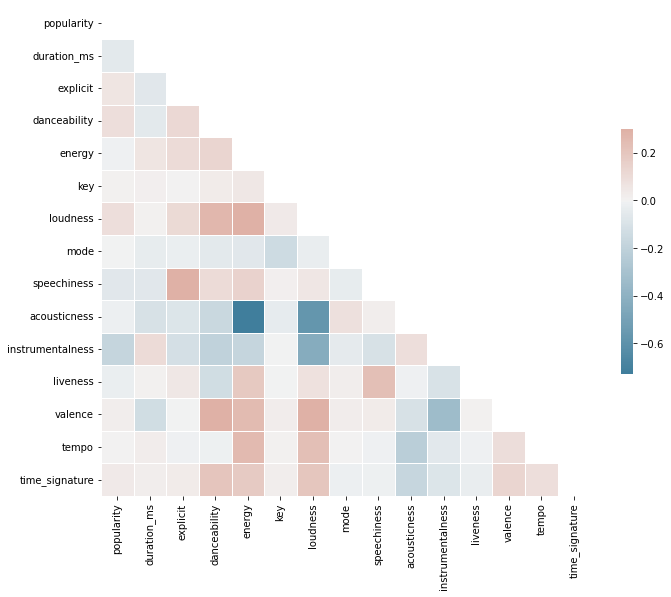

In [19]:
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

O que torna uma música popular?

Pelo gráfico de correlaçaõ não aparenta existir fortes correlações entre popularidade e as outras variáveis. As correlações são baixas. Portante, não aparenta existir um fator determinante para que a popularidade da música seja maior.

Vamos pegar os maiores valores de popularidade e analisar alguns fatores. 

# Variáveis Discretas

In [20]:
dfpopular = df.query('popularity >= 70')
dfpopular.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic


In [21]:
srpopular = df.groupby(by='track_genre').mean().popularity
srpopular

track_genre
acoustic       43.245884
afrobeat       24.590476
alt-rock       38.803089
alternative    35.870536
ambient        44.928571
                 ...    
techno         39.429022
trance         38.108014
trip-hop       33.963165
turkish        40.845477
world-music    41.398950
Name: popularity, Length: 113, dtype: float64

In [22]:
print(f'Mínimo: {srpopular.min()}, Máximo: {srpopular.max()}, Média: {srpopular.mean()}')

Mínimo: 2.178114086146682, Máximo: 59.019633507853406, Média: 35.83162124529247


<AxesSubplot:ylabel='Count'>

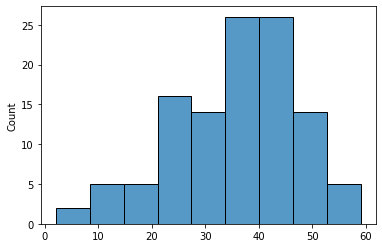

In [23]:
sns.histplot(srpopular.values)

Agrupando por gênero temos que a média de popularidade é de 33, e eu quero ver apenas os gêneros acima da média.

Text(0, 0.5, 'Popularidade')

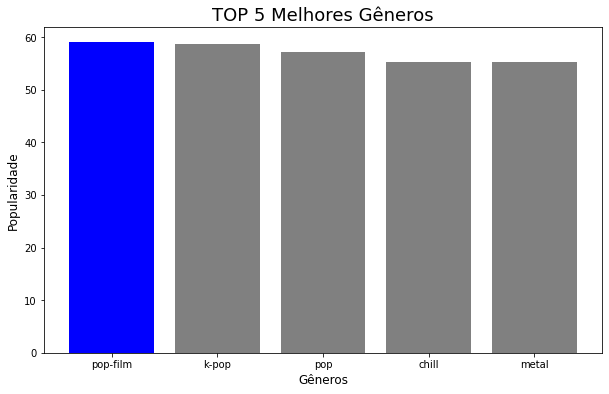

In [24]:
plt.figure(figsize = (10,6))
cores = ['gray']*10
cores[0] = 'b'
X = srpopular[srpopular.values >= 34].sort_values(ascending = False)[:5].index
Y = srpopular[srpopular.values >= 34].sort_values(ascending = False)[:5].values
plt.bar(x = X, height = Y, color = cores)

plt.title('TOP 5 Melhores Gêneros', fontsize = 18)
plt.xlabel('Gêneros', fontsize = 12)
plt.ylabel('Popularidade', fontsize = 12)

In [25]:
# Verificando se o indian não é indie escrito errado. E aparentemente não é.
srpopular[srpopular.index == 'indie']

track_genre
indie    41.215054
Name: popularity, dtype: float64

<BarContainer object of 5 artists>

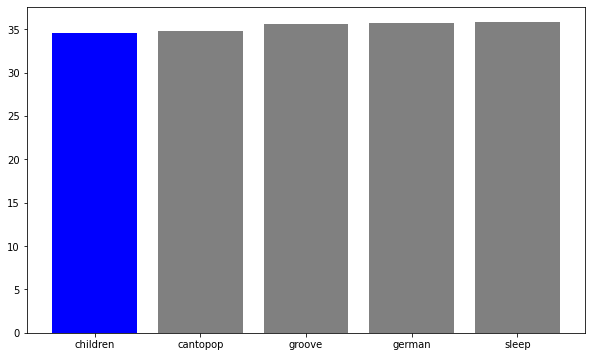

In [26]:
plt.figure(figsize = (10,6))
cores = ['gray']*10
cores[0] = 'b'
X = srpopular[srpopular.values >= 34].sort_values(ascending = True)[:5].index
Y = srpopular[srpopular.values >= 34].sort_values(ascending = True)[:5].values
plt.bar(x = X, height = Y, color = cores)

Existem gêneros que são mais populares que outros. Os 10 mais populares e 10 menos populares acima da média estão nos gráficos acima. 
Popularidade depende do gêneros

Mínimo: 0.0, Máximo: 100.0, Média: 36.40562812341923


Text(0, 0.5, 'Popularidade')

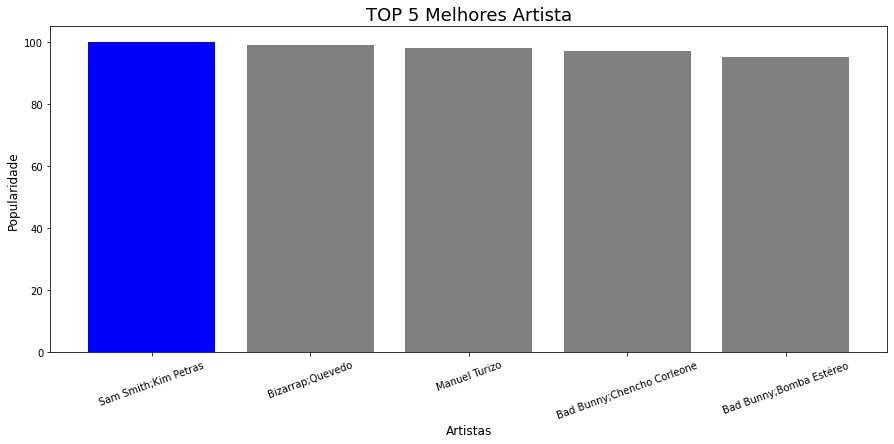

In [27]:
srpopular = df.groupby(by='artists').mean().popularity
print(f'Mínimo: {srpopular.min()}, Máximo: {srpopular.max()}, Média: {srpopular.mean()}')
plt.figure(figsize = (15,6))
cores = ['gray']*10
cores[0] = 'b'
srpopular[srpopular.values >= 37].sort_values(ascending = False)[:5]

X = srpopular[srpopular.values >= 37].sort_values(ascending = False)[:5].index
Y = srpopular[srpopular.values >= 37].sort_values(ascending = False)[:5].values
plt.bar(x = X, height = Y, color = cores)
plt.xticks(rotation=20)

plt.title('TOP 5 Melhores Artista', fontsize = 18)
plt.xlabel('Artistas', fontsize = 12)
plt.ylabel('Popularidade', fontsize = 12)

Mínimo: 0.0, Máximo: 100.0, Média: 34.386493315943916


Text(0, 0.5, 'Popularidade')

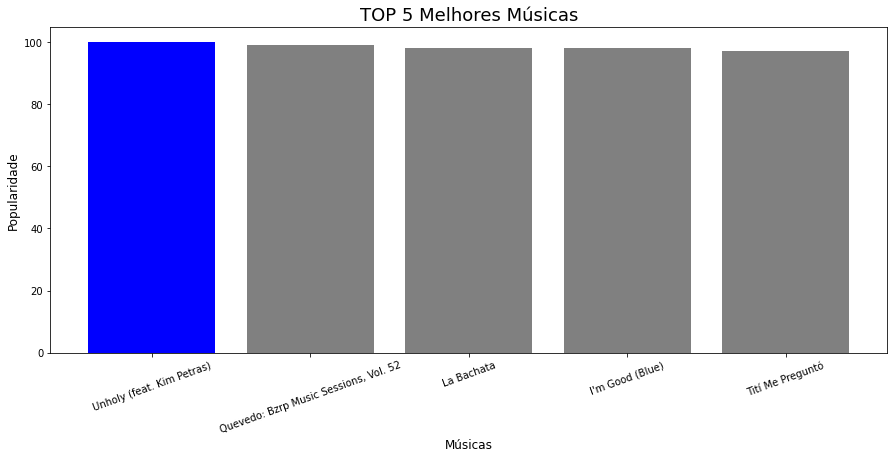

In [28]:
srpopular = df.groupby(by='track_name').mean().popularity
print(f'Mínimo: {srpopular.min()}, Máximo: {srpopular.max()}, Média: {srpopular.mean()}')
plt.figure(figsize = (15,6))
cores = ['gray']*10
cores[0] = 'b'
srpopular[srpopular.values >= 37].sort_values(ascending = False)[:5]

X = srpopular[srpopular.values >= 37].sort_values(ascending = False)[:5].index
Y = srpopular[srpopular.values >= 37].sort_values(ascending = False)[:5].values
plt.bar(x = X, height = Y, color = cores)
plt.xticks(rotation=20)

plt.title('TOP 5 Melhores Músicas', fontsize = 18)
plt.xlabel('Músicas', fontsize = 12)
plt.ylabel('Popularidade', fontsize = 12)

Também existe popularidade entre os artistas.

Note que existem mais de 1 track para um mesmo artista, pois se o artista cantou com outra pessoa aquela track pode estar com maior popularidade. Neste sentido, separar por artistas não reflete a popularidade do artista em si (ou dos artistas) e sim da track específica

In [29]:
df.track_id.value_counts()

5SuOikwiRyPMVoIQDJUgSV    1
5cjBiZxqUDm5wtc3NeePEl    1
393MehrSEiQgRYARQAixkT    1
7qAo2NkNmWt0uwbIlgHAMX    1
3VsqVo7lHy1hN1CwlXlW3P    1
                         ..
7KAQwDyAcdiHZhQU01KLkN    1
22UlKuHDa7r3Pyg47CJNI6    1
4mCbVmQ3Z4AkltKzwGSN0X    1
5p54INLXgza6Do7nTsFPpG    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: track_id, Length: 73609, dtype: int64

In [30]:
df[df.track_id =='6S3JlDAGk3uu3NtZbPnuhS' ]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues


Pesquisando na documentação do Spotipy (provável uso para obtenção dos dados) a coluna track_genre se refere ao gêneros que o artista está associado, e não a música específica. Desta forma é possível ter dados duplicados com alteração no gênero.

In [31]:
colunas = [
'popularity',
'duration_ms',
'danceability',
'energy',
'key',
'loudness',
'mode',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence',
'tempo',
'time_signature']

popularity


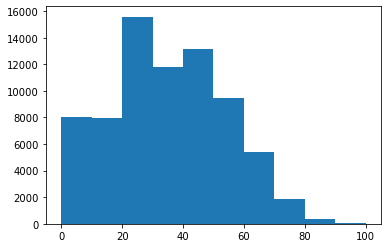

duration_ms


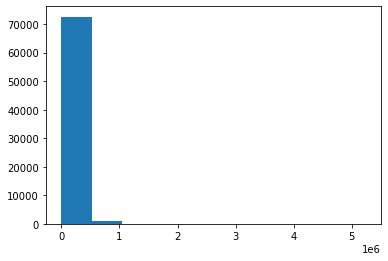

danceability


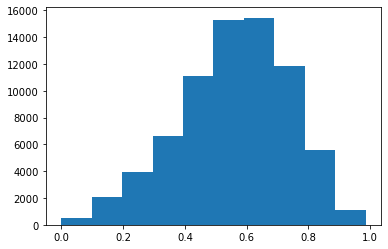

energy


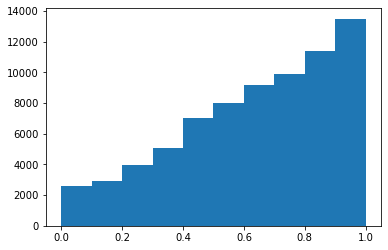

key


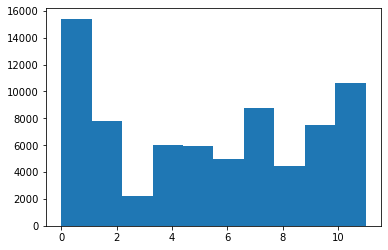

loudness


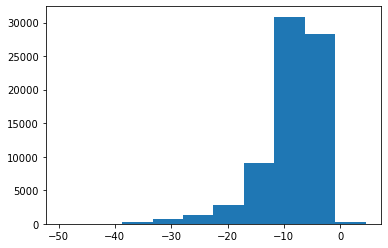

mode


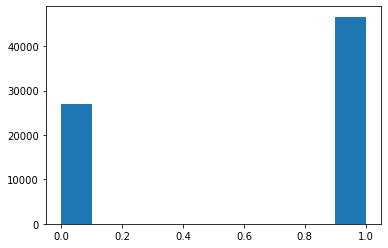

speechiness


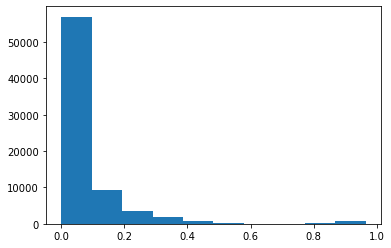

acousticness


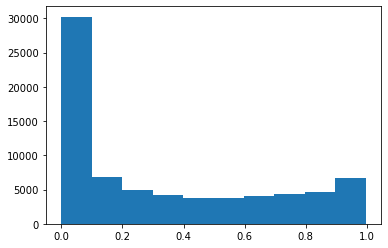

instrumentalness


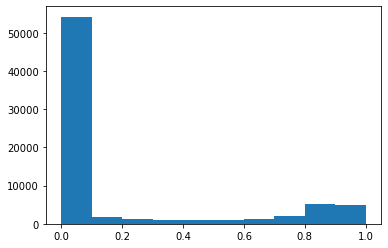

liveness


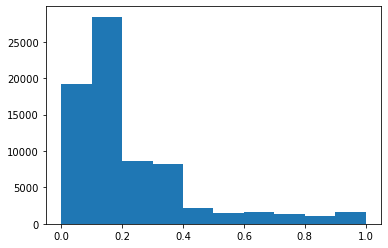

valence


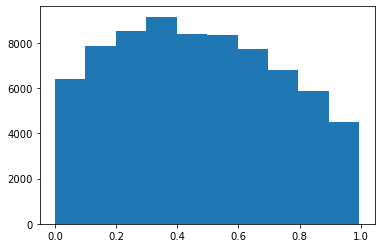

tempo


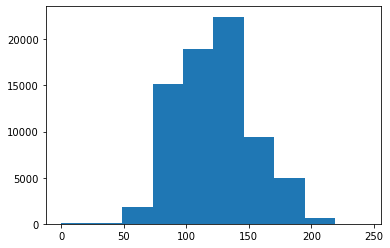

time_signature


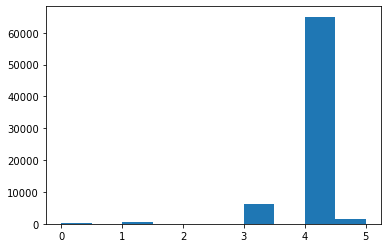

In [32]:
for i in colunas:
    print(i)
    plt.hist( x=df[i])
    plt.show()

In [33]:
df[colunas]

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22,305454,0.331,0.1710,1,-15.668,1,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3
113995,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4


In [34]:
df.explicit.value_counts()

False    67245
True      6364
Name: explicit, dtype: int64

<AxesSubplot:xlabel='popularity', ylabel='Count'>

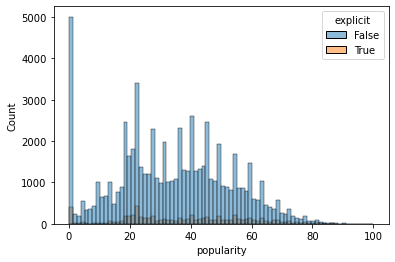

In [35]:
sns.histplot( x=df['popularity'], hue = df['explicit'])

Em relação ao explicit, que é ter ou não letra na música, não existe correlação com a popularidade. Apenas existe correlação com a spechless, que diz quão a música é falada. 

Ter ou não letra também não apresenta uma carga forte no momento de criar um modelo, já que não apresenta correlação com outros dados.

# Alterar dimensão dos dados para normalizar

In [36]:
df.explicit = df.explicit.map({False:0, True:1})
df.explicit

0         0
1         0
2         0
3         0
4         0
         ..
113994    0
113995    0
113996    0
113997    0
113999    0
Name: explicit, Length: 73609, dtype: int64

In [37]:
from sklearn import preprocessing

colunas.append('explicit')
x = df[colunas].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled, columns = colunas)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73609 entries, 0 to 73608
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        73609 non-null  float64
 1   duration_ms       73609 non-null  float64
 2   danceability      73609 non-null  float64
 3   energy            73609 non-null  float64
 4   key               73609 non-null  float64
 5   loudness          73609 non-null  float64
 6   mode              73609 non-null  float64
 7   speechiness       73609 non-null  float64
 8   acousticness      73609 non-null  float64
 9   instrumentalness  73609 non-null  float64
 10  liveness          73609 non-null  float64
 11  valence           73609 non-null  float64
 12  tempo             73609 non-null  float64
 13  time_signature    73609 non-null  float64
 14  explicit          73609 non-null  float64
dtypes: float64(15)
memory usage: 8.4 MB


In [38]:
df1.to_csv('dataset_normalizado.csv', index = False)

In [39]:
df.to_csv('dataset_tratado_completo.csv', index = False)